In [1]:
import pandas as pd

In [59]:
data = pd.read_csv("../../Data/2023_smartFarm_AI_hackathon_dataset.csv")
data1 = pd.read_csv("../../Data/2023_smartFarm_AI_hackathon_dataset.csv")
data.head()
data.tail() # 총 데이터 84839

,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
84835,DBSF9969,20180710,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,235272.042536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84836,DBSF9969,20180711,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,227947.124946,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84837,DBSF9969,20180712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,231527.426327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84838,DBSF9969,20180713,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,251254.321635,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84839,DBSF9969,20180714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84840 entries, 0 to 84839
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   frmDist                    84840 non-null  object 
 1   date                       84840 non-null  int64  
 2   inTp                       84840 non-null  float64
 3   inHd                       84840 non-null  float64
 4   otmsuplyqy                 84840 non-null  float64
 5   acSlrdQy                   84840 non-null  float64
 6   cunt                       84840 non-null  float64
 7   ph                         84840 non-null  float64
 8   outTp                      84840 non-null  float64
 9   outWs                      84840 non-null  float64
 10  daysuplyqy                 84840 non-null  float64
 11  inCo2                      84840 non-null  float64
 12  ec                         84840 non-null  float64
 13  frmYear                    84840 non-null  int

In [7]:
data[['date', 'frmYear', 'frmWeek']]

,date,frmYear,frmWeek
0,20220926,0,0
1,20221001,0,0
2,20221002,0,0
3,20221003,0,0
4,20221004,0,0
...,...,...,...
84835,20180710,0,0
84836,20180711,0,0
84837,20180712,0,0
84838,20180713,0,0


-----

# frmYear에 0 존재

In [8]:
data['frmYear'].value_counts()

frmYear
2018    38100
2017    25080
0       11580
2019    10080
Name: count, dtype: int64

frmYear -> 0년인 데이터가 존재..
> date와 frmYear가 일치하는지 체크 해봐야겠음


In [48]:
## date의 년도와 frmYear과 같은지 확인

date = pd.DataFrame(data['date'].astype(str).str[:4])
date['frmYear'] = data['frmYear']
date['date'] = date['date'].astype(int)
date['YN'] = date['frmYear'] == date['date']

date[date['YN'] == False].value_counts()
# date[date['YN'] == True]






date  frmYear  YN   
2022  0        False    8640
2018  0        False    1980
2019  0        False     720
2017  0        False     240
Name: count, dtype: int64

# [날짜함수] 날짜 데이터와 year 데이터가 일치하지 않을 경우 

In [64]:

# 날짜 데이터와 year 데이터가 일치하지 않을 경우
# df : dataframe 명
# col1 : 날짜 컬럼명 (토마토 데이터에서는 date)
# col2 : 년도 컬럼명 (토마토 데이터에서는 frmYear)
def getYear(df, col1, col2) :
    year = pd.DataFrame(df[col1].astype(str).str[:4].astype(int))
    year.columns = [col1]
    year[col2] = df[col2]
    
    df.loc[df[col2] == 0, col2] = year[col1]

    print(df[col2].value_counts())


getYear(data1, 'date', 'frmYear')

frmYear
2018    40080
2017    25320
2019    10800
2022     8640
Name: count, dtype: int64


In [71]:
week = pd.DataFrame(data['frmWeek'].value_counts())
week = week.sort_index()
week



frmWeek
0     11580
1      1620
2      1680
3      1680
4      1680
5      1680
6      1680
7      1680
8      1680
9      1680
10     1680
11     1680
12     1680
13     1680
14     1680
15     1680
16     1680
17     1680
18     1680
19     1680
20     1680
21     1680
22     1680
23     1410
24     1440
25     1230
26      990
27      240
28      210
29      210
30      210
31      390
32      420
33      630
34     1260
35     1260
36     1260
37     1260
38     1380
39     1470
40     1470
41     1470
42     1470
43     1560
44     1680
45     1680
46     1680
47     1680
48     1680
49     1680
50     1680
51     1680
52     1680
Name: count, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 44079 (\N{HANGUL SYLLABLE GAES}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51452 (\N{HANGUL SYLLABLE JU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


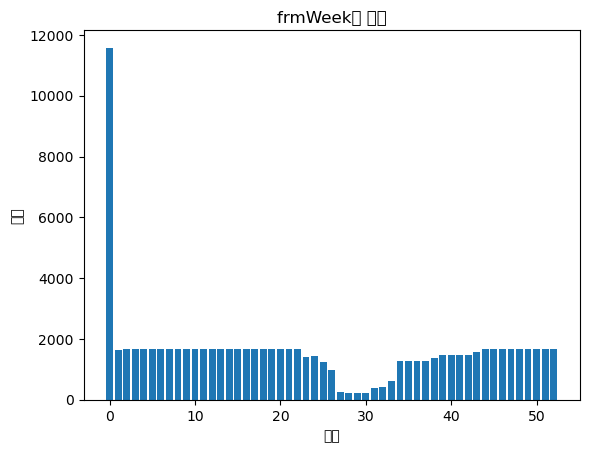

In [74]:
import numpy as np
import matplotlib.pyplot as plt

plt.bar(week.index, week['count'], label='dd')
plt.title("frmWeek별 갯수")
plt.xlabel('주차')
plt.ylabel('갯수')
plt.show()

 frmWeek는 0주차인 데이터가 11580개 존재    -> 대체할 수 있는 대체값 찾아보기
--------


In [84]:
data[data['frmWeek'] == 36][['date','frmWeek']]['date'].value_counts()

date
20170904    150
20170905    150
20170906    150
20170907    150
20170908    150
20170909    150
20170910    150
20180903     30
20180904     30
20180905     30
20180906     30
20180907     30
20180908     30
20180909     30
Name: count, dtype: int64

> 20170821 ~ 20170827 : 34주차    
> 20170828 ~ 20170903 : 35주차       
> 20170904 ~ 20170910 : 36주차

> 20180820 ~ 20180826 : 34주차      
> 20180827 ~ 20180902 : 35주차    
> 20180903 ~ 20180909 : 36주차

In [117]:
dates = data['date'].values
data['weeks'] = 0

for i, date in enumerate(data['date']):
    print("date : ", date)
    date = pd.to_datetime(date, format='%Y%m%d')

    week_number = date.isocalendar().week

    print(week_number)
    data.at[i, 'weeks'] = week_number # 'weeks' 열에 주 번호 저장
    # data['weeks'] = week_number

data[['date', 'frmWeek', 'weeks']]


date :  20220926
39
date :  20221001
39
date :  20221002
39
date :  20221003
40
date :  20221004
40
date :  20221005
40
date :  20221006
40
date :  20221007
40
date :  20221008
40
date :  20221009
40
date :  20221010
41
date :  20221011
41
date :  20221012
41
date :  20221013
41
date :  20221014
41
date :  20221015
41
date :  20221016
41
date :  20221017
42
date :  20221018
42
date :  20221019
42
date :  20221020
42
date :  20221021
42
date :  20221022
42
date :  20221023
42
date :  20221024
43
date :  20221025
43
date :  20221026
43
date :  20221027
43
date :  20221028
43
date :  20221029
43
date :  20221030
43
date :  20221031
44
date :  20221101
44
date :  20221102
44
date :  20221103
44
date :  20221104
44
date :  20221105
44
date :  20221106
44
date :  20221107
45
date :  20221108
45
date :  20221109
45
date :  20221110
45
date :  20221111
45
date :  20221112
45
date :  20221113
45
date :  20221114
46
date :  20221115
46
date :  20221116
46
date :  20221117
46
date :  20221118
46


,date,frmWeek,weeks
0,20220926,0,39
1,20221001,0,39
2,20221002,0,39
3,20221003,0,40
4,20221004,0,40
...,...,...,...
84835,20180710,0,28
84836,20180711,0,28
84837,20180712,0,28
84838,20180713,0,28


In [121]:
# data[data['frmWeek'] == 35][['frmWeek', 'weeks']].value_counts()
data[data['frmWeek'] == 37][['frmWeek', 'weeks']].value_counts()

frmWeek  weeks
37       37       1260
Name: count, dtype: int64

In [124]:
data[['date', 'frmWeek']]

,date,frmWeek
0,20220926,39
1,20221001,39
2,20221002,39
3,20221003,40
4,20221004,40
...,...,...
84835,20180710,28
84836,20180711,28
84837,20180712,28
84838,20180713,28


In [123]:
data['frmWeek'] = data['weeks']
data = data.drop(columns=['weeks'])
data.head()


,frmDist,date,inTp,inHd,otmsuplyqy,acSlrdQy,cunt,ph,outTp,outWs,...,outtrn_cumsum,WaterUsage,WaterCost,FertilizerUsage,FertilizerCost,CO2Usage,CO2Cost,MistUsageTime,Mist Cost,HeatingEnergyUsage_cumsum
0,DBSF1059,20220926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0
1,DBSF1059,20221001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1347.554178,202.133127,4711.308821,5936.249114,0.000000,0.0000,190.168990,2221.173803,0.0
2,DBSF1059,20221002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,69.899353,10.484903,271.379890,341.938662,0.000000,0.0000,0.000000,0.000000,0.0
3,DBSF1059,20221003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,412.225065,61.833760,1539.505534,1939.776973,253.744916,149.7095,0.000000,0.000000,0.0
4,DBSF1059,20221004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,590.608634,88.591295,2614.973165,3294.866187,3032.885084,1789.4022,1.149739,13.428955,0.0
